## 3115-Lab Programming Machine Learning

### Lab Exercise 3
**Yuvaraj Prem Kumar, 303384**

### 1.1 Data preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.seterr(all='raise')
%matplotlib inline

(1/2) Preprocessing steps:
1. Read data with read_csv(). Check delimiter, and if required manual input of column names.
2. Check if any missing or NaN values.
3. Get current shape of dataframe.

Airfare dataset = df1 <br>
Wine dataset = df2 <br>
Parkinsons dataset = df3 <br>

For all the datasets, we can refer to their description text files. These not only provide column names, but also alot of information regarding the data types, its usage and importance, and finally additional notes from the dataset owner.

In [3]:
# Function for missing or NA values
def checknull(dataframe):
    i = dataframe.isnull().sum().sum()
    if i == 0:
        print('No NaN values in dataset')
    else:
        print('NaN values found:', i)

**(DF1) Airfare dataset preprocessing**

The first dataset is "Airfare and demand", with the column "price" as our target. The .data file has no headers, no NA values, and is space delimited. It doesn't seem that any columns should be dropped here, they seem to be important in the prediction.

In [4]:
col_names1 = ['City1','City2','Average Fare','Distance','Average weekly passengers','Market leading airline',
           'Market share','Average fare','Low price airline','Market share 2','Price']

df1 = pd.read_csv('airq402.data',header=None, names=col_names1, delim_whitespace=True)
df1.head(5)

,City1,City2,Average Fare,Distance,Average weekly passengers,Market leading airline,Market share,Average fare,Low price airline,Market share 2,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [5]:
# Call function to check if any NaN values
checknull(df1)

No NaN values in dataset


In [6]:
df1.describe()

,Average Fare,Distance,Average weekly passengers,Market share,Average fare,Market share 2,Price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


From the dataframe describe output, we can see which are the numeric column which dont need further preprocessing, and what is missing. The non-numerical columns should be converted. We can use pd.get_dummies to convert the categorical output.

In [7]:
df1 = pd.get_dummies(df1)
df1.shape

(1000, 217)

In [8]:
df1.head(5)

,Average Fare,Distance,Average weekly passengers,Market share,Average fare,Market share 2,Price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0


**(2) Wine dataset preprocessing**

Based on the website in [1]; "These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods."

Since the owners did not say which input variables are relevant, I decide not to drop any columns. There are no NA values, all numeric columns (nothing to be converted to categorical), and no headers. The dataset is ";" separated.

In [9]:
df2 = pd.read_csv('winequality-red.csv', sep = ';')
df2.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The describe function returns all columns, meaning all are numeric. No further conversion necessary.

In [11]:
# Call function to check if any NaN values
checknull(df2)

No NaN values in dataset


**(DF3) Parkinsons dataset**

Based from [2]; "This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring.

Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around 200 recordings per patient, the subject number of the patient is identified in the first column."

We can drop the following columns:
* Subject number: ID columns are normally not included in regression tasks.
* motor_upds: We just use one target column in this exercise, so we can drop this.
* RPDE, DFA, PPE: The dataset description states these are nonlinear or exponential columns, so they are dropped to avoid adding to the regression complexity.
* All the "Shimmer" columns. Admittedly these could be useful in making a better prediction model, but Jitter column should already be sufficient in terms of this Parkinsons dataset. Besides that, they are dropped to avoid larger processing and complexity, since this Lab 3 already has 3 datasets etc.

In [12]:
df3 = pd.read_csv('parkinsons_updrs.data', sep = ',')
df3.head(5)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [13]:
df3 = df3[[ 'age', 'sex', 'test_time', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP' ]]

In [14]:
df3.head(5)

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP
0,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204
1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395
2,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616
3,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573
4,72,0,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278


In [15]:
df3.describe()

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,0.317787,92.863722,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962
std,8.821524,0.465656,53.445602,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371
min,36.000000,0.000000,-4.262500,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980
25%,58.000000,0.000000,46.847500,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730
50%,65.000000,0.000000,91.523000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750
75%,72.000000,1.000000,138.445000,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870
max,85.000000,1.000000,215.490000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630


The describe function returns all columns, meaning all are numeric. No further conversion necessary.

In [16]:
# Call function to check if any NaN values
checknull(df3)

No NaN values in dataset


(2/2) Preprocessing steps:
1. Add bias column of '1'
2. Split dataframes into x_data and y_data dataframes, the observations and target variables.
2. Split further into train and test set.
3. Get current shape.

In [17]:
# Append column of "ones" to first index position
df1.insert(0, "Bias", 1)
df2.insert(0, "Bias", 1)
df3.insert(0, "Bias", 1)

In [18]:
# Target and observation sets for each dataframe
x_df1 = df1.drop(['Price'], axis=1)
y_df1 = df1['Price']

x_df2 = df2.drop(['quality'], axis=1)
y_df2 = df2['quality']

x_df3 = df3.drop(['total_UPDRS'], axis=1)
y_df3 = df3['total_UPDRS']

In [19]:
# Function to split into 80% train dataset and 20% test dataset
def train_test_split(x_dataframe, y_dataframe, ratio):
    mask = np.random.rand(len(x_dataframe)) < ratio
    x_train, y_train = x_dataframe[mask], y_dataframe[mask]
    x_test, y_test = x_dataframe[~mask], y_dataframe[~mask]
    print('Shape of x_train:', x_train.shape, 'Shape of y_train:', y_train.shape)
    print('Shape of x_test:', x_test.shape, 'Shape of y_test:', y_test.shape)
    return x_train, y_train, x_test, y_test

In [20]:
# Airline
x_train1, y_train1, x_test1, y_test1 = train_test_split(x_df1, y_df1, 0.8)

Shape of x_train: (774, 217) Shape of y_train: (774,)
Shape of x_test: (226, 217) Shape of y_test: (226,)


In [21]:
# Wine
x_train2, y_train2, x_test2, y_test2 = train_test_split(x_df2, y_df2, 0.8)

Shape of x_train: (1293, 12) Shape of y_train: (1293,)
Shape of x_test: (306, 12) Shape of y_test: (306,)


In [22]:
# Parkinsons
x_train3, y_train3, x_test3, y_test3 = train_test_split(x_df3, y_df3, 0.8)

Shape of x_train: (4678, 9) Shape of y_train: (4678,)
Shape of x_test: (1197, 9) Shape of y_test: (1197,)


### Linear Regression with Gradient Descent

**Part A: Implement Linear Regression with Gradient Descent**

From [3], we can implement the following learn-linregGD and minimize-GD algorithms

<img src="https://i.imgur.com/K0pjAfZ.jpg" width="45%" align="left"/>
<img src="https://i.imgur.com/I16j3R0.jpg" width="45%" align="left"/>

Also the objective function and gradient calculation via loss minimization follows the following algorithm: <br>
<img src="https://i.imgur.com/CZKjot5.jpg" width="25%" align="left"/>

The steps are:
1. Initialize $\beta$ (already done in Section 1.1). The lecture slides show intial $\beta$ as zeroes, but I found it either does not converge for backtracking, or converge too slowly (fixed step and bold driver are ok), requiring more than the 1000 iteration limit. Hence I set it to 'ones', so that I can make the comparision between the 3 methods.
2. Calculate $\hat{Y} = X.\beta$
3. $\beta_{new} = \beta + 2.\alpha.(y - \hat{y}).X$, (where $\alpha$ is learning rate)
4. Calculate new predicted $\hat{Y}$
5. Calculate relative error $\sum{|Y-\hat{Y}|}$
6. Calculate RMSE (taken from Lab 1 and 2)

In [23]:
# Helper functions: predicted value, y_hat; least squares loss; RMSE between ground truth and predicted value
def predict(X, beta):
    y_hat = np.dot(X, beta)
    return y_hat


def rmse_calc(ytest, ytest_hat):
    rmse = np.sqrt((np.sum(np.square(ytest - ytest_hat), axis = 1)) / len(ytest))
    return rmse


def least_squares_loss(prev_ytest_hat, ytest_hat):
    lss = np.sum(np.abs(prev_ytest_hat - ytest_hat), axis = 1)
    return lss

In [24]:
# Plotting function, to plot RMSE values side by side, and change in function value y: |f(x−1) − f(x)| side by side
# Cycle through the 3 alpha values
def pred_plot(Residuals, RMSE, alpha):

    #fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle("Change in Function Value vs Iterations", fontsize=20)
    for i in range(len(alpha)):
        fig.add_subplot(1, 3, i+1)
        plt.plot(Residuals[i])
        plt.xlabel("Iterations")
        plt.title("Learning Rate: {}".format(alpha[i]))
                        
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle("RMSE (Fixed-step length) vs Iterations", fontsize=20)
    for i in range(len(alpha)):
        fig.add_subplot(1, 3, i+1)
        plt.title("Learning Rate: {}".format(alpha[i]))
        plt.plot(RMSE[i], color='green')
        plt.xlabel("Iterations")
        plt.ylabel("RMSE value")
        
    plt.show()

In [25]:
# Main linear regression function with gradient descent
def learn_linreg_GD(xtrain, ytrain, xtest, ytest, iters, alpha):
    
    xtrain = xtrain.to_numpy()  # Unpack dataframe to numpy arrays
    ytrain = ytrain.to_numpy()
    ytest = ytest.to_numpy()
    xtest = xtest.to_numpy()
    
     
    beta = np.matrix([1] * xtrain.shape[1]).T  # Column of ones for intial betas array
    rmse, loss = [], []  # Empty list to append history
    prev_ytest_hat = predict(xtest, beta).T 
    
    for i in range(iters):
        y_hat = predict(xtrain, beta).T
        
        df = - 2 * (ytrain - y_hat) * xtrain  # Negative slope
        beta = beta - (alpha * df).T  # Update beta

        # Change in yhat, loss on test set, RMSE
        try:
            ytest_hat = predict(xtest, beta).T
            lss = least_squares_loss(prev_ytest_hat, ytest_hat)
            prev_ytest_hat = ytest_hat
            loss.append(lss[0,0])      # Append loss history, its a tuple list (1) alpha (2) value history

            rmse_val = rmse_calc(ytest, ytest_hat)
            rmse.append(rmse_val[0,0]) 
            
        except:
            print("Exception raised: Not converged in i_max iterations of", i)
            break          

    return loss, rmse

**(1/3) Airline dataset loss and RMSE plots**

In [26]:
alpha1 = [1e-5, 1e-11, 1e-12]  # Loop through with 3 different values of alpha (step length)
iterations = 1000
Residual_loss_1 = [None] * iterations  #Initialize empty list of length iterations for appending
RMSE_1 = [None] * iterations

for i in range(len(alpha1)):
    print("\nAirfare dataset with Learning Rate = ", alpha1[i])
    Residual_loss_1[i], RMSE_1[i]  = learn_linreg_GD(x_train1, y_train1, x_test1, y_test1, iterations, alpha1[i])
    print("Final RMSE value:{} ".format(RMSE_1[i][-1]))  # Printing last value in the list


Airfare dataset with Learning Rate =  1e-05
Exception raised: Not converged in i_max iterations of 33
Final RMSE value:6.182692884796236e+151 

Airfare dataset with Learning Rate =  1e-11
Final RMSE value:102.26081032160955 

Airfare dataset with Learning Rate =  1e-12
Final RMSE value:172.38143781831775 


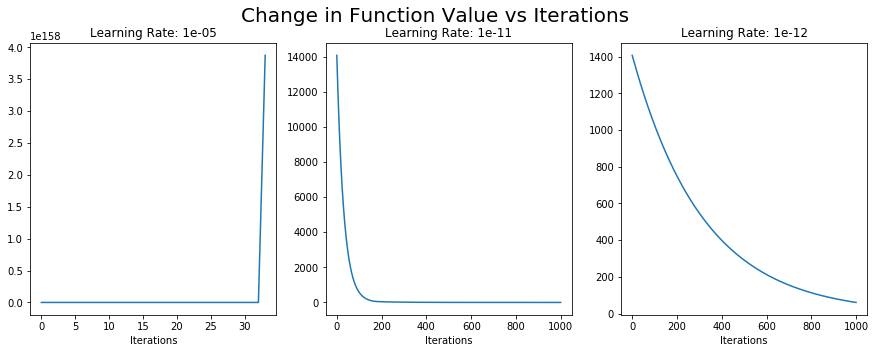

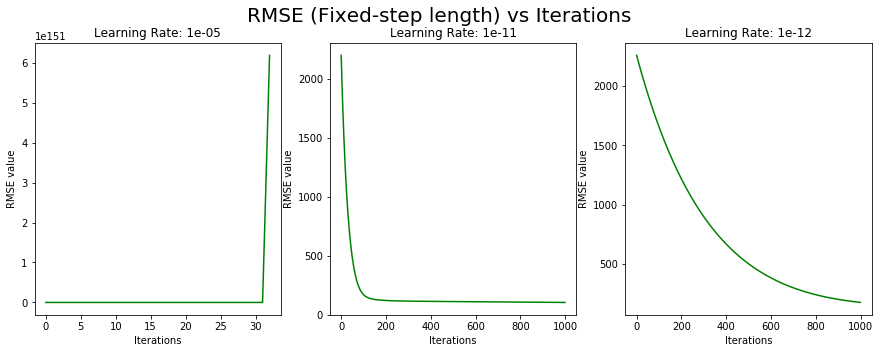

In [27]:
pred_plot(Residual_loss_1, RMSE_1, alpha1)

The 3 learning rates are {1$e^{-5}$, 1$e^{-11}$, 1$e^{-12}$} with 1000 iterations. From the plots:
* Learning rate [1$e^{-5}$]; failed convergence (diverged) after iteration 33 likely due to the high learning rate. This also increased the RMSE value instead of lowering it. 
* Learning rate [1$e^{-11}$]; function sharply descended, and even before 200 iterations it had reached its local minima. RMSE value dropped to its minimum correspondingly.
* Learning rate [1$e^{-12}$]; it is shown to be too small as the function was still descending after 1000 iterations. RMSE value is decreasing quickly, but not within the 1000 iteration limit.

**(2/3) Wine dataset loss and RMSE plots**

In [28]:
alpha2 = [1e-5, 1e-8, 1e-10]  # Loop through with 3 different values of alpha (step length)
iterations = 500
Residual_loss_2 = [None] * iterations  #Initialize empty list of length iterations for appending
RMSE_2 = [None] * iterations

for i in range(len(alpha2)):
    print("\nWine Dataset with Learning Rate = ", alpha2[i])
    Residual_loss_2[i], RMSE_2[i]  = learn_linreg_GD(x_train2, y_train2, x_test2, y_test2, iterations, alpha2[i])
    print("Final RMSE value:{} ".format(RMSE_2[i][-1])) 


Wine Dataset with Learning Rate =  1e-05
Exception raised: Not converged in i_max iterations of 76
Final RMSE value:3.835478411060633e+151 

Wine Dataset with Learning Rate =  1e-08
Final RMSE value:4.50427265270933 

Wine Dataset with Learning Rate =  1e-10
Final RMSE value:61.07619157125574 


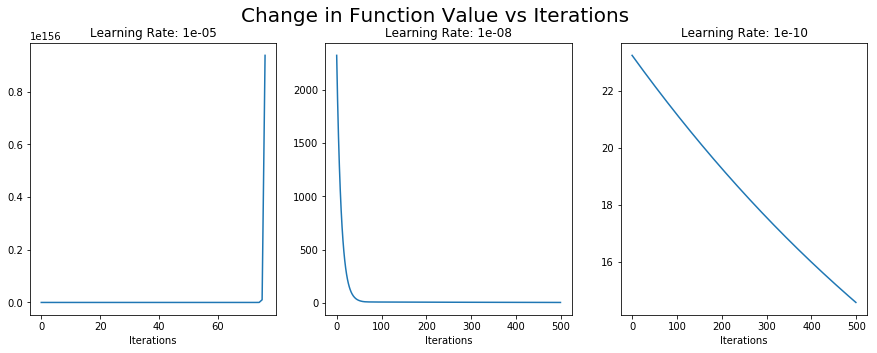

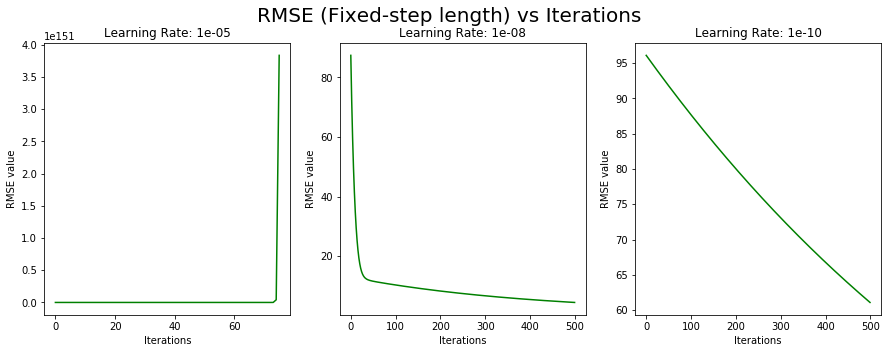

In [29]:
pred_plot(Residual_loss_2, RMSE_2, alpha2)

The 3 learning rates are {1$e^{-5}$, 1$e^{-8}$, 1$e^{-10}$} with 500 iterations. From the plots:
* Learning rate [1$e^{-5}$]; failed convergence (diverged) after iteration 76 likely due to the high learning rate. This also increased the RMSE value instead of lowering it. 
* Learning rate [1$e^{-8}$]; function sharply descended, and even before 200 iterations it had reached its local minima. RMSE value dropped to its minimum correspondingly to 4.233444382829801 .
* Learning rate [1$e^{-10}$]; it is shown to be too small as the function was still descending after 1000 iterations. RMSE value is decreasing quickly, but not within the 500 iteration limit. At this stage, RMSE value was 60.44949418134585.

**(3/3) Parkinsons dataset loss and RMSE plots**

In [30]:
alpha3 = [1e-5, 1e-9, 1e-11]  # Loop through with 3 different values of alpha (step length)
iterations = 1000
Residual_loss_3 = [None] * iterations  #Initialize empty list of length iterations for appending
RMSE_3 = [None] * iterations

for i in range(len(alpha3)):
    print("\nParkinsons Dataset with Learning Rate = ", alpha3[i])
    Residual_loss_3[i], RMSE_3[i]  = learn_linreg_GD(x_train3, y_train3, x_test3, y_test3, iterations, alpha3[i])
    print("Final RMSE value:{} ".format(RMSE_3[i][-1])) 


Parkinsons Dataset with Learning Rate =  1e-05
Exception raised: Not converged in i_max iterations of 47
Final RMSE value:1.0866836408168012e+150 

Parkinsons Dataset with Learning Rate =  1e-09
Final RMSE value:10.469772582735521 

Parkinsons Dataset with Learning Rate =  1e-11
Final RMSE value:35.44110580905822 


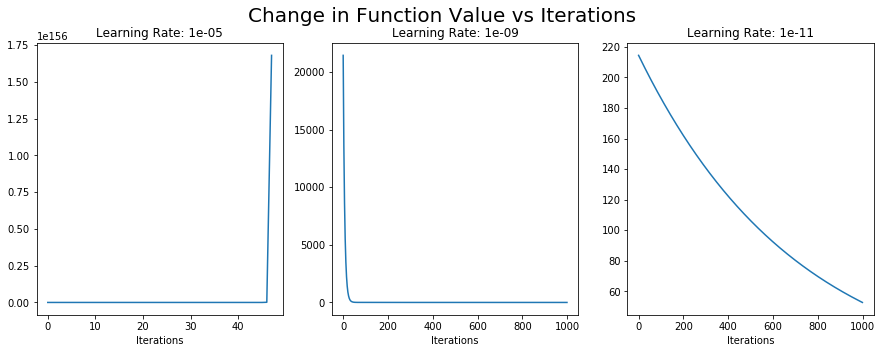

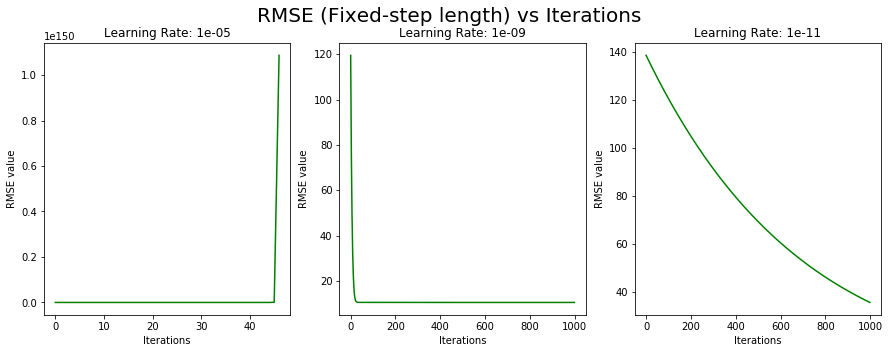

In [31]:
pred_plot(Residual_loss_3, RMSE_3, alpha3)

The 3 learning rates are {1$e^{-5}$, 1$e^{-9}$, 1$e^{-11}$} with 500 iterations. From the plots:
* Learning rate [1$e^{-5}$]; failed convergence (diverged) after iteration 47 likely due to the high learning rate. This also increased the RMSE value instead of lowering it. 
* Learning rate [1$e^{-9}$]; function sharply descended, and even before 100 iterations it had reached its local minima. RMSE value dropped to its minimum correspondingly to 10.15971011395376.
* Learning rate [1$e^{-11}$]; it is shown to be too small as the function was still descending after 1000 iterations. RMSE value is decreasing quickly, but not within the 500 iteration limit. At this stage, RMSE value was 36.50733841019403.

**Part B: Step Length for Gradient Descent**

**Steplength-backtracking implementation**

For this part, the algorithm follows the lecture slides:
<img src="https://i.imgur.com/6yOLbeY.jpg" width="35%" /><br>


Same as fixed length part, here we calculate:
* The change in function value of predicted y: $|f_{(x−1)} − f_{(x)}|$ and plot against the iterations.
* RMSE on test set and plot against the iterations.

In [32]:
# Function for backtracking line search, also adapted from [5] and [6] (armijio algorithm)
def stepsize_backtracking(xtrain, ytrain, alpha, beta, gamma): 
    y_hat = predict(xtrain, beta).T
    dfx = - 2 * (ytrain - y_hat) * xtrain    
    fx = np.square(ytrain - y_hat)
    f_loss = predict(xtrain + alpha*dfx, beta).T
    
    left = np.sum(fx - np.square(ytrain - f_loss), axis = 1)
    right = alpha * gamma * dfx * dfx.T
    
    while left < right:  # Keep looping to recalculate alpha
        alpha = alpha / 2
        f_loss = predict(xtrain - alpha*dfx, beta).T  # Subtract here
        left = np.sum(fx - np.square(ytrain - f_loss), axis = 1)
        right = alpha * gamma * dfx * dfx.T
    return alpha  # New learning rate

In [33]:
def learn_linreg_BT(xtrain, ytrain, xtest, ytest, iters, alpha, gamma):
    
    xtrain = xtrain.to_numpy()  # Unpack dataframe to numpy arrays
    ytrain = ytrain.to_numpy()
    ytest = ytest.to_numpy()
    xtest = xtest.to_numpy()
    
    beta = np.matrix([1] * xtrain.shape[1]).T  # Column of zeros for intial betas array
    rmse, loss = [], []  # Empty list to append history
    prev_ytest_hat = predict(xtest, beta).T 
    
    for i in range(iters):
        y_hat = predict(xtrain, beta).T
        #lss = predict(xtest, beta).T 
        
        # Update learning rate using armijo
        alpha = stepsize_backtracking(xtrain, ytrain, alpha, beta, gamma)
        
        
        df = - 2 * (ytrain - y_hat) * xtrain  # Negative slope
        beta = beta - (alpha * df).T  # Update beta

        # Change in yhat, loss on test set, RMSE
        try:
            ytest_hat = predict(xtest, beta).T
            lss = least_squares_loss(prev_ytest_hat, ytest_hat)
            prev_ytest_hat = ytest_hat
            loss.append(lss[0,0])      # Append loss history

            rmse_val = rmse_calc(ytest, ytest_hat)
            rmse.append(rmse_val[0,0])  # Append RMSE history
            
        except:
            print("Exception raised: Not converged in i_max iterations of", i)
            break          

    return loss, rmse

**(1/3) Airline dataset loss and RMSE plots**

In [34]:
alpha1 = [1e-5, 1e-11, 1e-12]  # Loop through with 3 different values of alpha (step length)
iterations = 1000
gamma = 0.0001
Residual_loss_1 = [None] * iterations  #Initialize empty list of length iterations for appending
RMSE_1 = [None] * iterations

for i in range(len(alpha1)):
    print("\nAirlines Dataset with Learning Rate = ", alpha1[i])
    Residual_loss_1[i], RMSE_1[i]  = learn_linreg_BT(x_train1, y_train1, x_test1, y_test1, iterations, alpha1[i], gamma)
    print("Final RMSE value:{} ".format(RMSE_1[i][-1])) 


Airlines Dataset with Learning Rate =  1e-05
Final RMSE value:2212110.855737705 

Airlines Dataset with Learning Rate =  1e-11
Final RMSE value:2198.184868749582 

Airlines Dataset with Learning Rate =  1e-12
Final RMSE value:2261.0198727629977 


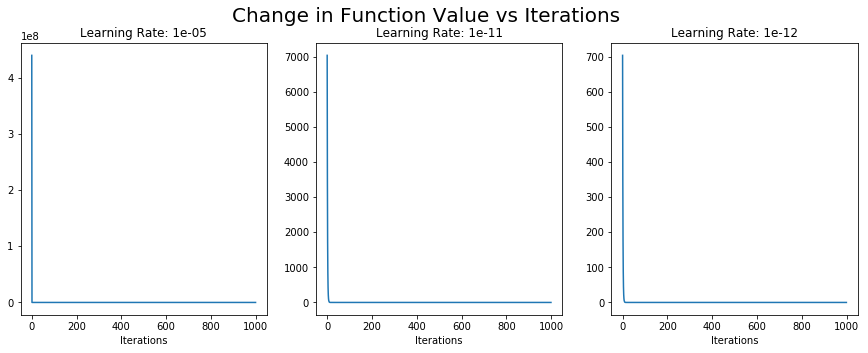

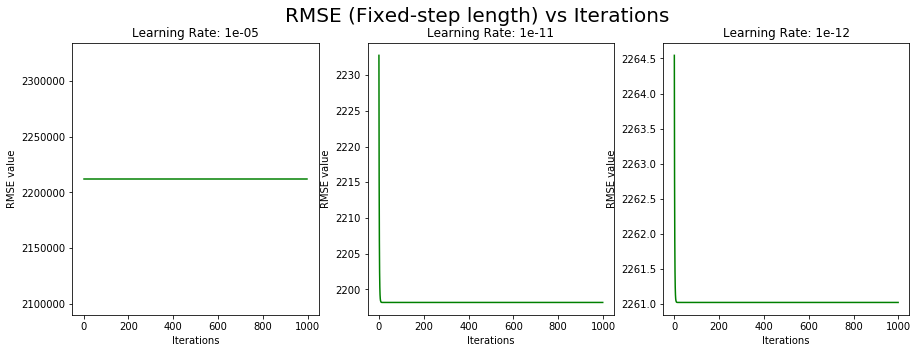

In [35]:
pred_plot(Residual_loss_1, RMSE_1, alpha1)

The 3 learning rates are {1$e^{-5}$, 1$e^{-11}$, 1$e^{-12}$} with 1000 iterations and stepsize reduction factor, gamma = 0.0001. From the plots:
* Learning rate [1$e^{-5}$]; due to too high learning rate, even with backtracking it does not have any reduction from initial RMSE value even after 1000 iterations. RMSE stayed at 2207727.197000908.
* Learning rate [1$e^{-11}$]; function sharply descended, and even before 100 iterations it had reached its local minima. Final RMSE value was 2155.216497464948. 
* Learning rate [1$e^{-12}$]; function sharply descended, and even before 100 iterations it had reached its local minima. Final RMSE value was 2217.9264773523337. 

However, its noted that final RMSE value is larger compared to those of fixed-step-length method.

**(2/3) Wine dataset loss and RMSE plots**

In [36]:
alpha2 = [1e-5, 1e-8, 1e-10]  # Loop through with 3 different values of alpha (step length)
iterations = 500
gamma = 0.01
Residual_loss_2 = [None] * iterations  #Initialize empty list of length iterations for appending
RMSE_2 = [None] * iterations

for i in range(len(alpha2)):
    print("\nWine Dataset with Learning Rate = ", alpha2[i])
    Residual_loss_2[i], RMSE_2[i]  = learn_linreg_BT(x_train2, y_train2, x_test2, y_test2, iterations, alpha2[i], gamma)
    print("Final RMSE value:{} ".format(RMSE_2[i][-1]))


Wine Dataset with Learning Rate =  1e-05
Final RMSE value:2135.6064328361467 

Wine Dataset with Learning Rate =  1e-08
Final RMSE value:87.64104667590082 

Wine Dataset with Learning Rate =  1e-10
Final RMSE value:96.1181225256497 


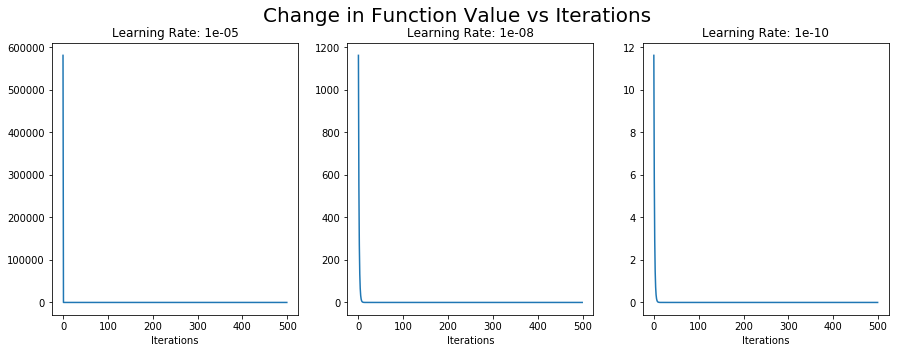

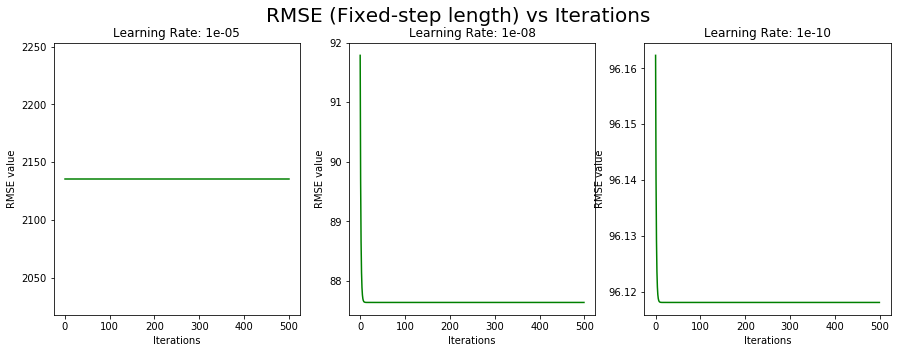

In [37]:
pred_plot(Residual_loss_2, RMSE_2, alpha2)

The 3 learning rates are {1$e^{-5}$, 1$e^{-8}$, 1$e^{-10}$} with 500 iterations and steepness reduction factor, gamma = 0.01 From the plots:
* Learning rate [1$e^{-5}$]; its able to converge eventually this time, even with too high intial learning rate, with final RMSE value of 2078.6959652925516.
* Learning rate [1$e^{-8}$]; function sharply descended, and even before 20 iterations it had reached its local minima. RMSE value dropped to its minimum correspondingly to 86.29459220059537 
* Learning rate [1$e^{-10}$]; the function was able to descend this time, with final RMSE value of 94.55045718240736 in comparison to fixed-step-length method.

**(3/3) Parkinsons dataset loss and RMSE plots**

In [38]:
alpha3 = [1e-5, 1e-9, 1e-11]  # Loop through with 3 different values of alpha (step length)
iterations = 1000
gamma = 0.01
Residual_loss_3 = [None] * iterations  #Initialize empty list of length iterations for appending
RMSE_3 = [None] * iterations

for i in range(len(alpha3)):
    print("\nParkinsons Dataset with Learning Rate = ", alpha3[i])
    Residual_loss_3[i], RMSE_3[i]  = learn_linreg_BT(x_train3, y_train3, x_test3, y_test3, iterations, alpha3[i], gamma)
    print("Final RMSE value:{} ".format(RMSE_3[i][-1])) 


Parkinsons Dataset with Learning Rate =  1e-05
Final RMSE value:166.02327033505108 

Parkinsons Dataset with Learning Rate =  1e-09
Final RMSE value:129.20040118554152 

Parkinsons Dataset with Learning Rate =  1e-11
Final RMSE value:138.70753629455788 


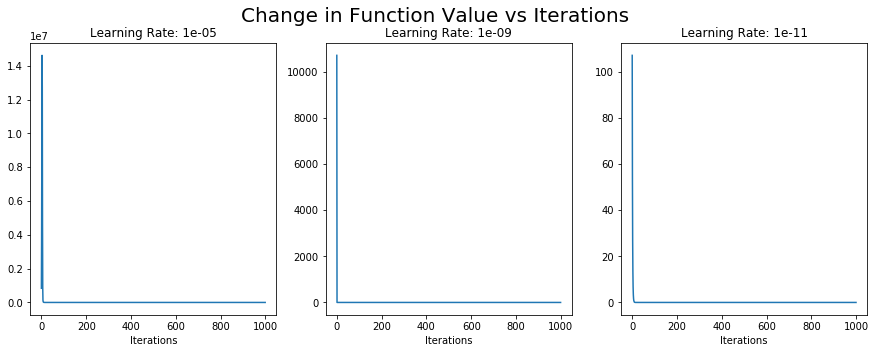

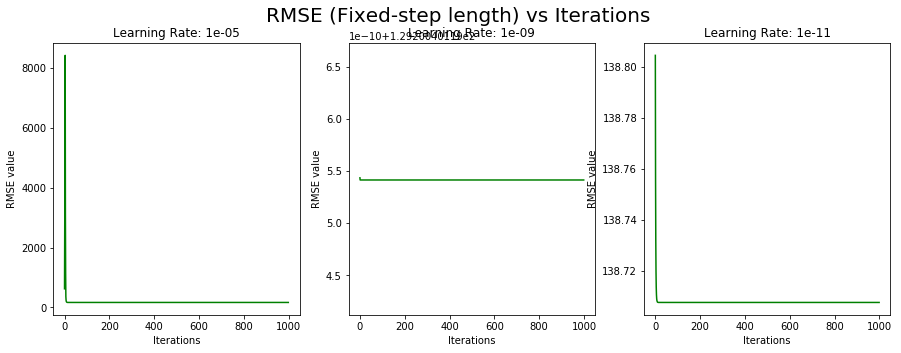

In [39]:
pred_plot(Residual_loss_3, RMSE_3, alpha3)

The 3 learning rates are {1$e^{-5}$, 1$e^{-9}$, 1$e^{-11}$} with 1000 iterations and steepness reduction factor, gamma = 0.01. From the plots:
* Learning rate [1$e^{-5}$]; was able to converge eventually this time, with final RMSE value 
* Learning rate [1$e^{-9}$]; function sharply descended, and even before 100 iterations it had reached its local minima. Intial RMSE value was already at the minimum, so it did not descend further during the 1000 iterations limit. Final RMSE value was 131.45534891035672, but it was higher compared to the fixed-step-length method.
* Learning rate [1$e^{-11}$]; RMSE value is decreasing quickly, with final value of 141.01255401362496 .

Its noted that final RMSE values are higher in comparision to the fixed-step-length method, but this can be played around with by changing the steepness reduction factor values.

**Steplength-bolddriver implementation**

For this part, the algorithm follows the lecture slides and from [6].
<img src="https://i.imgur.com/FFGNhNu.jpg" width="45%" /><br>

Bold Driver steplength makes the assumption that smaller step sizes are needed when closer to the optimum [8]
* Adjusts the step size based on the value of $f(x)$ at time $t$. 
* If the value of $f(x)$ grows, the step size must decrease.
* If the value of $f(x)$ decreases, the step size can be larger for faster convergence.

In [40]:
# Bold-driver step-length update, code adapted from [8]
def steplength_bolddriver(xtrain, ytrain, alpha, beta, inc_factor, dec_factor): 
    y_hat = predict(xtrain, beta).T
    dfx = - 2 * (ytrain - y_hat) * xtrain    
    fx = np.square(ytrain - y_hat)
    f_loss = predict(xtrain + alpha*dfx, beta).T
    fx_ad = np.square(ytrain - f_loss)
    cond = np.sum(fx - fx_ad, axis = 1).item(0)
    alpha = alpha * inc_factor
    
    while  cond <= -0.01:  # Slides used 0 but it will run forever, current value chosen from [6] and trial and error.
        alpha = alpha * dec_factor
        f_loss = predict(xtrain + alpha*dfx, beta).T
        fx_ad = np.square(ytrain - f_loss)
        cond = np.sum(fx - fx_ad, axis = 1).item(0)
    return alpha

In [41]:
def learn_linreg_BD(xtrain, ytrain, xtest, ytest, iters, alpha, inc_factor, dec_factor):
    
    xtrain = xtrain.to_numpy()  # Unpack dataframe to numpy arrays
    ytrain = ytrain.to_numpy()
    ytest = ytest.to_numpy()
    xtest = xtest.to_numpy()
    
    beta = np.matrix([0] * xtrain.shape[1]).T  # Column of zeros for intial betas array
    rmse, loss = [], []  # Empty list to append history
    prev_ytest_hat = predict(xtest, beta).T 
    
    for i in range(iters):
        y_hat = predict(xtrain, beta).T
        #lss = predict(xtest, beta).T 
        
        alpha = steplength_bolddriver(xtrain, ytrain, alpha, beta, inc_factor, dec_factor)
        
        
        df = - 2 * (ytrain - y_hat) * xtrain  # Negative slope
        beta = beta - (alpha * df).T  # Update beta

        # Change in yhat, loss on test set, RMSE
        try:
            ytest_hat = predict(xtest, beta).T
            lss = least_squares_loss(prev_ytest_hat, ytest_hat)
            prev_ytest_hat = ytest_hat
            loss.append(lss[0,0])      # Append loss history

            rmse_val = rmse_calc(ytest, ytest_hat)
            rmse.append(rmse_val[0,0])  # Append RMSE history
            
        except:
            print("Exception raised: Not converged in i_max iterations of", i)
            break          

    return loss, rmse

**(1/3) Airfare dataset loss and RMSE plots**

In [42]:
alpha1 = [1e-5, 1e-11, 1e-12]  # Loop through with 3 different values of alpha (step length)
iterations = 1000
inc_factor = 1.1
dec_factor = 0.5

Residual_loss_1 = [None] * iterations  #Initialize empty list of length iterations for appending
RMSE_1 = [None] * iterations

for i in range(len(alpha1)):
    print("\nAirlines Dataset with Learning Rate = ", alpha1[i])
    Residual_loss_1[i], RMSE_1[i]  = learn_linreg_BD(x_train1, y_train1, x_test1, y_test1, 
                                                     iterations, alpha1[i], inc_factor, dec_factor)
    print("Final RMSE value:{} ".format(RMSE_1[i][-1])) 


Airlines Dataset with Learning Rate =  1e-05
Final RMSE value:4783737.137703887 

Airlines Dataset with Learning Rate =  1e-11
Final RMSE value:137.63536587071158 

Airlines Dataset with Learning Rate =  1e-12
Final RMSE value:138.48042835901387 


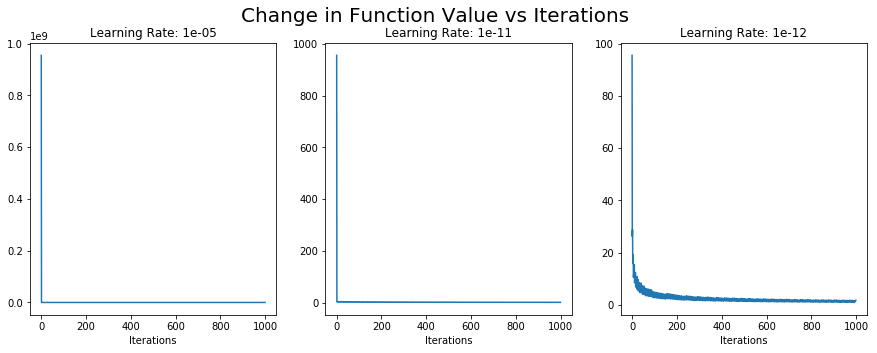

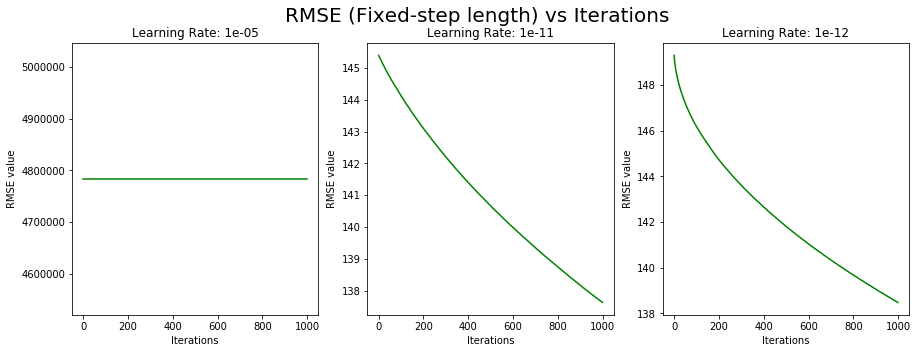

In [43]:
pred_plot(Residual_loss_1, RMSE_1, alpha1)

The 3 learning rates are {1$e^{-5}$, 1$e^{-11}$, 1$e^{-12}$} with 1000 iterations. From the plots:
* Learning rate [1$e^{-5}$]; due to too high learning rate, even with bolddriver it does not have any reduction from initial RMSE value even after 1000 iterations.
* Learning rate [1$e^{-11}$]; function sharply descended, and even before 100 iterations it had reached its local minima. Final RMSE value is 134.21320740600225. 
* Learning rate [1$e^{-12}$]; function sharply descended, and even before 100 iterations it had reached its local minima. Final RMSE value is 135.05116764001264.

**(2/3) Wine dataset loss and RMSE plots**

In [44]:
alpha2 = [1e-5, 1e-8, 1e-10]  # Loop through with 3 different values of alpha (step length)
iterations = 500
inc_factor = 1.1
dec_factor = 0.5

Residual_loss_2 = [None] * iterations  #Initialize empty list of length iterations for appending
RMSE_2 = [None] * iterations

for i in range(len(alpha2)):
    print("Airlines Dataset ----> Learning Rate = ", alpha2[i])
    Residual_loss_2[i], RMSE_2[i]  = learn_linreg_BD(x_train2, y_train2, x_test2, y_test2, 
                                                     iterations, alpha2[i], inc_factor, dec_factor)
    print("Final RMSE value:{} ".format(RMSE_2[i][-1]))

Airlines Dataset ----> Learning Rate =  1e-05
Final RMSE value:487.94510861705436 
Airlines Dataset ----> Learning Rate =  1e-08
Final RMSE value:4.409642721283521 
Airlines Dataset ----> Learning Rate =  1e-10
Final RMSE value:4.483063156812568 


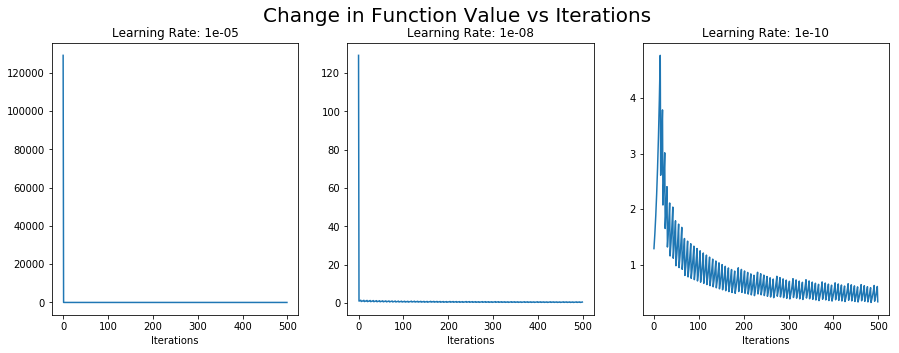

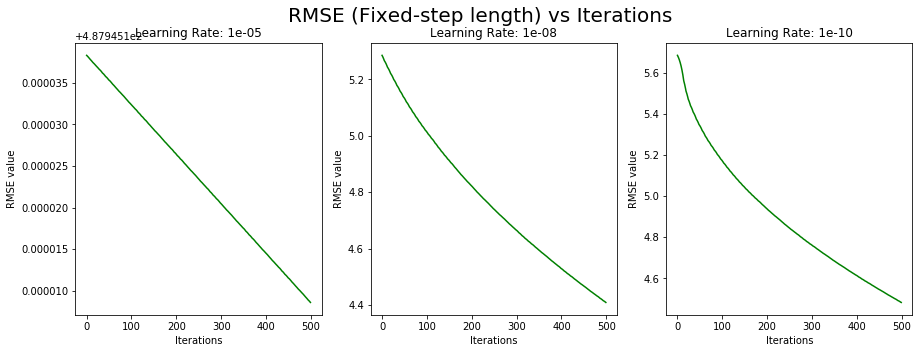

In [45]:
pred_plot(Residual_loss_2, RMSE_2, alpha2)

The 3 learning rates are {1$e^{-5}$, 1$e^{-8}$, 1$e^{-10}$} with 500 iterations. From the plots:
* Learning rate [1$e^{-5}$]; its able to converge eventually this time, even with too high intial learning rate, with final RMSE value of 473.01848309511564.
* Learning rate [1$e^{-8}$]; function sharply descended, and even before 100 iterations it had reached its local minima. RMSE value dropped to its minimum correspondingly to 4.4012980286675285.
* Learning rate [1$e^{-10}$]; function sharply descended, and even before 100 iterations it had reached its local minima. RMSE value dropped to its minimum correspondingly to 4.476420968588635.

**(3/3) Parkinsons dataset loss and RMSE plots**

In [46]:
alpha3 = [1e-5, 1e-9, 1e-11]  # Loop through with 3 different values of alpha (step length)
iterations = 1000
inc_factor = 1.1
dec_factor = 0.5

Residual_loss_3 = [None] * iterations  #Initialize empty list of length iterations for appending
RMSE_3 = [None] * iterations

for i in range(len(alpha2)):
    print("Parkinsons Dataset ----> Learning Rate = ", alpha2[i])
    Residual_loss_3[i], RMSE_3[i]  = learn_linreg_BD(x_train3, y_train3, x_test3, y_test3, 
                                                     iterations, alpha3[i], inc_factor, dec_factor)
    print("Final RMSE value:{} ".format(RMSE_3[i][-1]))

Parkinsons Dataset ----> Learning Rate =  1e-05
Final RMSE value:41350.48668280695 
Parkinsons Dataset ----> Learning Rate =  1e-08
Final RMSE value:27.40392504978634 
Parkinsons Dataset ----> Learning Rate =  1e-10
Final RMSE value:30.27727991048274 


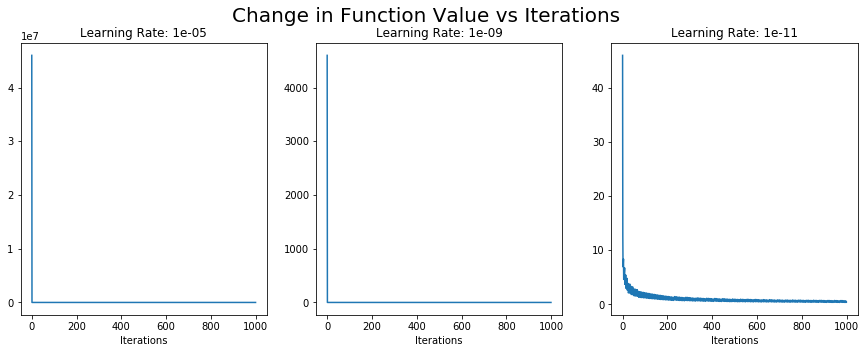

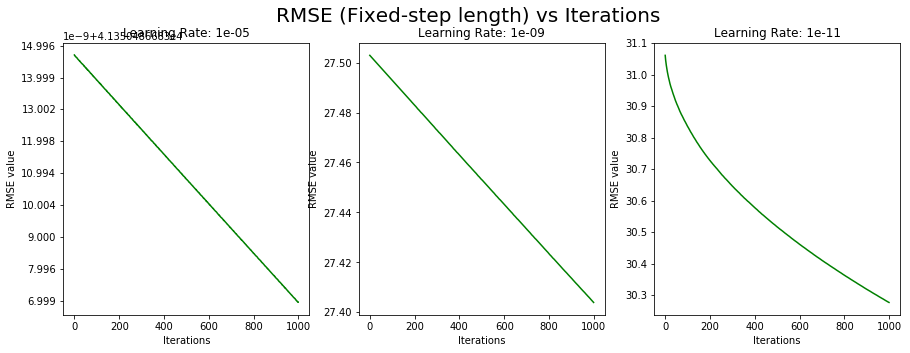

In [47]:
pred_plot(Residual_loss_3, RMSE_3, alpha3)

The 3 learning rates are {1$e^{-5}$, 1$e^{-9}$, 1$e^{-11}$} with 1000 iterations. From the plots:
* Learning rate [1$e^{-5}$]; was able to converge eventually this time, although with high final RMSE value 41673.25950025187.
* Learning rate [1$e^{-9}$]; function sharply descended, and even before 100 iterations it had reached its local minima. Final RMSE value was 27.40109937945275.
* Learning rate [1$e^{-11}$]; function sharply descended and RMSE value is decreasing quickly, with final value of 30.300279795438097.

**Remarks**
* Steplength-backtracking and steplength-bolddriver methods are able to avoid raising exceptions during convergence (the function does not diverge) as compared to fixed-step method.
* However, both of them take a longer time to run (overall time is of course low due to only 1000 max iterations). But if we were to change the epochs etc, it would be computationally more expensive.
* For two datasets (Airfare and Wine), seems that backtracking did not produce a better RMSE value in comparison to fixed-step, however this could be due to the initial steepness factor used (0.0001). I experimented with other values, but found no reduction in RMSE
* Bold-driver seems to be the best method (based on parameters used) of all three, as it returns the lowest RMSE values. However its noted that the function value $|f_{x_i−1} − f_{x_i}|$ graph is jumping up and down during eventual covergence.

## References:

[1] http://archive.ics.uci.edu/ml/datasets/Wine+Quality <br>
[2] https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/ <br>
[3] https://www.ismll.uni-hildesheim.de/lehre/ml-19w/script/ml-02-A1-linear-regression.pdf <br>
[4] https://medium.com/@lachlanmiller_52885/understanding-and-calculating-the-cost-function-for-linear-regression-39b8a3519fcb <br>
[5] https://nlperic.github.io/line-search/ <br>
[6] https://stackoverflow.com/questions/52204231/implementing-backtracking-line-search-algorithm-for-unconstrained-optimization-p<br>
[7] https://media.ed.ac.uk/media/%E2%80%9CBold+Driver%E2%80%9D+Gradient+Descent/1_813trhda <br>
[8] https://www.thelearningpoint.net/computer-science/python-for-data-8-ada-grad-vs-bold-driver-for-linear-classification<br>